In [11]:
import pandas as pd
import numpy as np
import datetime

# This is buoy data
This datacomes from NOAA. The station is 42040: LUKE OFFSHORE TEST PLATFORM - 63 NM South of Dauphin Island, AL.
See https://www.ndbc.noaa.gov/station_history.php?station=42040

In [12]:
def read_file(fname, has_second_header=True):
    if has_second_header:
        header = [0,1]
    else:
        header = 0
    df = pd.read_csv(fname, sep='\s+', header=header)
    if has_second_header:
        df.columns = [h1 for (h1,h2) in df.columns]
    def mkyear(v):
        v = int(v)
        if v<100:
            return 1900+v
        else:
            return v
    if 'mm' in df.columns:
        df['timestamp']=df.apply(lambda s:datetime.datetime(mkyear(s[0]), int(s[1]), int(s[2]), int(s[3]), int(s[4])),
                                 axis=1)
    else:
        df['timestamp']=df.apply(lambda s:datetime.datetime(mkyear(s[0]), int(s[1]), int(s[2]), int(s[3]), 0),
                                 axis=1)        
    df['ATMP'] = df['ATMP'].apply(lambda v:np.NaN if v>100 else v) # 999 is used to indicate no data available
    df['WTMP'] = df['WTMP'].apply(lambda v:np.NaN if v>100 else v) # 999 is used to indicate no data available  
    print("%s has %d entries" % (fname, len(df)))
    return df
df1995 = read_file('data/42040/buoy_data_1995.txt', has_second_header=False)
df1995.head()

data/42040/buoy_data_1995.txt has 648 entries


,YY,MM,DD,hh,WD,WSPD,GST,WVHT,DPD,APD,MWD,BAR,ATMP,WTMP,DEWP,VIS,timestamp
0,95,12,4,22,240,5.2,6.5,0.3,2.9,3.2,999,1015.0,21.4,21.5,18.8,99.0,1995-12-04 22:00:00
1,95,12,4,23,248,3.7,4.4,0.4,3.4,3.5,999,1015.0,21.2,21.3,19.1,99.0,1995-12-04 23:00:00
2,95,12,5,0,251,3.3,3.9,0.4,3.2,3.5,999,1015.1,20.7,21.2,19.3,99.0,1995-12-05 00:00:00
3,95,12,5,1,247,3.1,3.6,0.4,3.8,3.5,999,1015.7,21.1,21.4,20.0,99.0,1995-12-05 01:00:00
4,95,12,5,2,236,3.0,3.5,0.4,3.6,3.5,999,1015.7,21.2,21.9,20.2,99.0,1995-12-05 02:00:00


In [13]:
df2017 = read_file('data/42040/buoy_data_2017.txt', has_second_header=True)
df2017.head(6)

data/42040/buoy_data_2017.txt has 41943 entries


,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,timestamp
0,2017,1,1,0,0,161,10.0,12.4,99.00,99.00,99.00,999,1014.9,22.6,22.6,18.3,99.0,99.0,2017-01-01 00:00:00
1,2017,1,1,0,10,159,9.8,11.8,99.00,99.00,99.00,999,1014.9,22.7,22.6,18.6,99.0,99.0,2017-01-01 00:10:00
2,2017,1,1,0,20,156,10.1,12.7,99.00,99.00,99.00,999,1014.8,22.7,22.6,18.6,99.0,99.0,2017-01-01 00:20:00
3,2017,1,1,0,30,160,10.2,12.5,99.00,99.00,99.00,999,1015.1,22.8,22.6,18.7,99.0,99.0,2017-01-01 00:30:00
4,2017,1,1,0,40,160,10.2,12.9,1.64,6.25,4.62,999,1015.1,22.8,22.6,18.7,99.0,99.0,2017-01-01 00:40:00
5,2017,1,1,0,50,164,10.1,12.5,99.00,99.00,99.00,999,1015.2,22.9,22.6,18.8,99.0,99.0,2017-01-01 00:50:00


In [14]:

df2017.groupby(pd.Grouper(key = "timestamp", freq="M")).agg({'ATMP':['median', 'mean', 'min', 'max'],
                                                             'WTMP':['median', 'mean', 'min', 'max']})

ATMP                          WTMP                       
           median       mean   min   max median       mean   min   max
timestamp                                                             
2017-01-31  18.35  17.553388   5.3  24.0   21.8  20.375305  14.4  28.6
2017-02-28    NaN        NaN   NaN   NaN    NaN        NaN   NaN   NaN
2017-03-31    NaN        NaN   NaN   NaN    NaN        NaN   NaN   NaN
2017-04-30  22.80  22.568722  17.4  25.4   23.4  23.434612  22.0  25.3
2017-05-31  24.20  24.078296  17.2  27.2   25.4  25.029930  22.5  27.7
2017-06-30  26.70  26.627153  21.9  28.8   27.2  27.403161  25.7  30.8
2017-07-31  28.70  28.579362  23.9  31.1   29.7  29.730201  28.0  31.6
2017-08-31  29.20  29.021751  24.0  31.4   30.3  30.224921  28.0  33.5
2017-09-30  27.70  27.306088  22.6  29.5   28.7  28.699604  26.1  30.9
2017-10-31  26.50  25.056928  13.3  28.5   27.7  27.512427  25.7  29.1
2017-11-30  22.20  21.735736  14.8  25.4   25.2  25.279054  23.3  26.9
2017-12-31  18.70  18.505893   8.2  24.8   23.2  23.302208  20.4  25.1

In [15]:
df2017.describe()

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
count,41943.0,41943.000000,41943.000000,41943.000000,41943.000000,41943.000000,41943.000000,41943.000000,41943.000000,41943.000000,41943.000000,41943.000000,41943.000000,41922.000000,41714.00000,41943.000000,41943.0,41943.0
mean,2017.0,7.595570,15.338936,11.488925,25.000596,156.619031,5.380469,6.936833,82.779722,84.793593,83.363928,876.649810,1018.641208,24.396443,26.36389,20.324836,99.0,99.0
std,0.0,3.008185,8.749242,6.921301,17.078315,97.567308,3.570282,4.186789,36.432436,33.528845,35.124391,297.977367,124.119351,4.360487,3.00922,22.589611,0.0,0.0
min,2017.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,2.150000,2.580000,0.000000,998.500000,5.300000,14.40000,1.000000,99.0,99.0
25%,2017.0,5.000000,8.000000,5.000000,10.000000,79.000000,3.000000,4.000000,99.000000,99.000000,99.000000,999.000000,1014.300000,22.300000,23.90000,17.000000,99.0,99.0
50%,2017.0,8.000000,15.000000,11.000000,30.000000,141.000000,5.000000,6.300000,99.000000,99.000000,99.000000,999.000000,1016.900000,25.150000,26.40000,21.800000,99.0,99.0
75%,2017.0,10.000000,23.000000,17.000000,40.000000,227.000000,7.400000,9.400000,99.000000,99.000000,99.000000,999.000000,1019.400000,27.900000,28.90000,24.100000,99.0,99.0
max,2017.0,12.000000,31.000000,23.000000,50.000000,999.000000,99.000000,99.000000,99.000000,99.000000,99.000000,999.000000,9999.000000,31.400000,33.50000,999.000000,99.0,99.0


In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

In [17]:
df1996=read_file('data/42040/buoy_data_1996.txt')
df1996.head()

data/42040/buoy_data_1996.txt has 8783 entries


,YY,MM,DD,hh,WD,WSPD,GST,WVHT,DPD,APD,MWD,BAR,ATMP,WTMP,DEWP,VIS,timestamp
0,96,1,1,1,348,6.3,7.5,1.08,7.69,4.53,999,1007.0,19.0,20.1,15.4,99.0,1996-01-01 01:00:00
1,96,1,1,2,27,4.4,5.7,1.03,7.69,4.68,999,1006.7,19.0,21.1,15.4,99.0,1996-01-01 02:00:00
2,96,1,1,3,73,5.3,6.0,1.02,7.69,5.27,999,1006.6,19.5,21.2,16.1,99.0,1996-01-01 03:00:00
3,96,1,1,4,66,4.2,5.1,0.97,7.14,5.40,999,1007.1,19.9,21.2,16.2,99.0,1996-01-01 04:00:00
4,96,1,1,5,63,3.8,4.6,0.97,7.14,5.47,999,1006.3,19.8,21.2,16.3,99.0,1996-01-01 05:00:00


In [18]:
df2000=read_file('data/42040/buoy_data_2000.txt', has_second_header=False)
df2000.head()

data/42040/buoy_data_2000.txt has 8172 entries


,YYYY,MM,DD,hh,WD,WSPD,GST,WVHT,DPD,APD,MWD,BAR,ATMP,WTMP,DEWP,VIS,TIDE,timestamp
0,2000,1,1,0,108,2.1,2.4,0.59,4.55,4.14,999,1018.0,20.6,20.8,16.0,99.0,NaN,2000-01-01 00:00:00
1,2000,1,1,1,151,3.4,4.1,0.64,4.55,4.34,999,1018.3,20.7,20.9,16.3,99.0,NaN,2000-01-01 01:00:00
2,2000,1,1,2,171,3.3,4.0,0.57,4.76,4.12,999,1018.7,20.9,21.0,16.5,99.0,NaN,2000-01-01 02:00:00
3,2000,1,1,3,171,4.3,4.8,0.57,5.00,4.10,999,1018.6,20.9,21.1,16.7,99.0,NaN,2000-01-01 03:00:00
4,2000,1,1,4,183,4.1,5.0,0.53,5.00,4.01,999,1018.9,21.1,21.1,16.6,99.0,NaN,2000-01-01 04:00:00


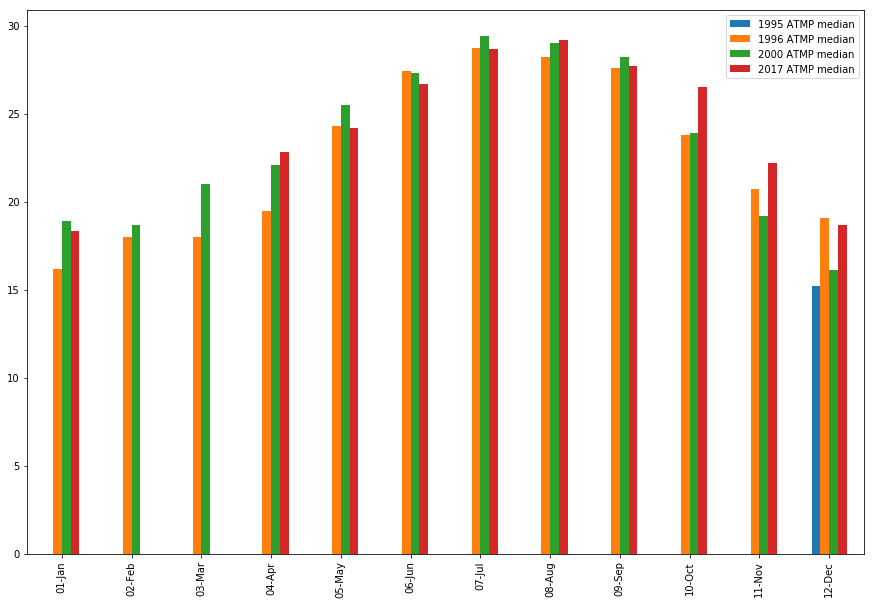

In [19]:
def build_median_df(df, base_col, year,
                    index=['01-Jan', '02-Feb', '03-Mar', '04-Apr', '05-May', '06-Jun',
                           '07-Jul', '08-Aug', '09-Sep', '10-Oct', '11-Nov', '12-Dec']):
    grouped=df.groupby(pd.Grouper(key = "timestamp", freq="M")).agg({base_col:['median']})
    grouped.columns=['%s %s median'%(year, base_col)]
    grouped['month'] = index
    grouped.set_index('month', drop=True, inplace=True)
    return grouped
grouped2017=build_median_df(df2017, 'ATMP', 2017)
grouped1995=build_median_df(df1995, 'ATMP', 1995, index=['12-Dec'])
grouped1996=build_median_df(df1996, 'ATMP', 1996)
grouped2000=build_median_df(df2000, 'ATMP', 2000)
grouped=pd.concat([grouped1995, grouped1996, grouped2000, grouped2017], axis=1, sort=True)
grouped.plot(figsize=(15,10), kind='bar');
#grouped

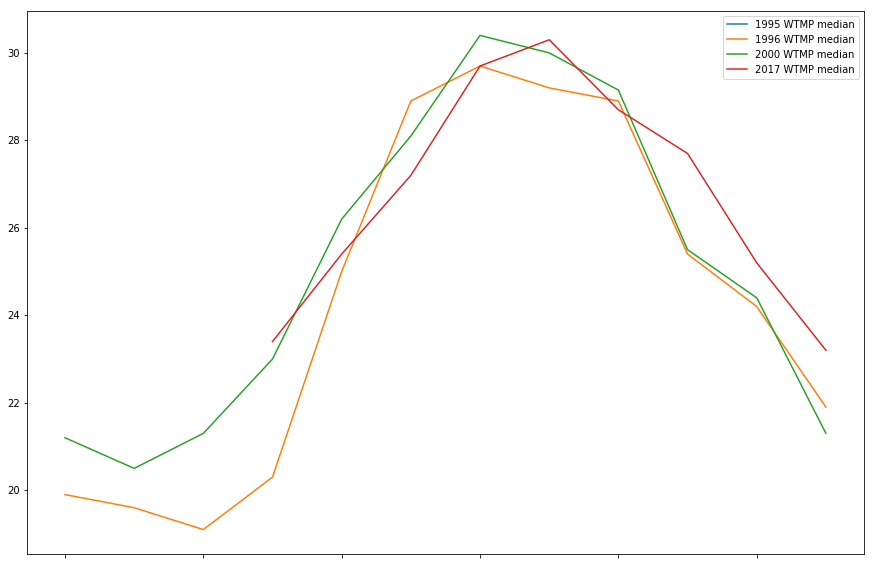

In [23]:
grouped2017w=build_median_df(df2017, 'WTMP', 2017)
grouped1995w=build_median_df(df1995, 'WTMP', 1995, index=['12-Dec'])
grouped1996w=build_median_df(df1996, 'WTMP', 1996)
grouped2000w=build_median_df(df2000, 'WTMP', 2000)
groupedw=pd.concat([grouped1995w, grouped1996w, grouped2000w, grouped2017w], axis=1, sort=True)
groupedw.plot(figsize=(15,10), kind='line');